In [37]:
from node_class_model import Model, train
import dgl
import torch
from dgl.data import RedditDataset
from dgl.nn import GNNExplainer
import networkx as nx

In [38]:
data = RedditDataset()
g = data[0]

In [39]:
model = torch.load('./models/Reddit_Trained_Model.pt', map_location=torch.device('cpu'))

In [61]:
def displaySG(nodeID):
    # Defines explainer model and trains model to explain node
    features = g.ndata['feat']
    explainer = GNNExplainer(model, num_hops=2, lr=0.001, num_epochs=150)
    new_center, sg, feat_mask, edge_mask = explainer.explain_node(nodeID, g, features)
    
    # Draws sub-graph
    nx_G = sg.to_networkx().to_undirected()
    # Create Node Color Map
    colors = ['azure', 'tan', 'wheat', 'lavender', 'lightskyblue', 'lightsalmon', 'lightgreen', 'thistle', 
              'slateblue', 'roseybrown', 'plum', 'peru', 'pink', 'palegreen', 'olive', 'moccasin', 'mintcream',
              'oldlace', 'linen', 'maroon', 'green', 'yellow', 'blue', 'orange', 'lightyellow', 'lightpink',
              'lavenderblush', 'ivory', 'purple', 'violet', 'lightgray', 'darkgreen', 'darkyellow', 'darkblue',
              'honeydue', 'darkpurple', 'darkorange', 'coral', 'hotpink', 'gainsboro']
    color_map = []
    for i, node in enumerate(nx_G):
        if node == new_center.numpy()[0]:
            color_map.append('gray')
        else:
            color_map.append(colors[sg.ndata['label'].numpy()[i]])
        
    # Draw Graph
    pos = nx.kamada_kawai_layout(nx_G)
    nx.draw_networkx(nx_G, pos, node_color=color_map, with_labels=True)
    print(colors[sg.ndata['label'].numpy()[new_center.numpy()[0]]])
    
    return feat_mask, edge_mask


Explain node {node_id}: 100%|████████████████| 150/150 [00:00<00:00, 400.79it/s]

yellow


(tensor(0.6415),
 tensor([0.6230, 0.5875, 0.3384, 0.6385, 0.4159, 0.4205, 0.3714, 0.3128, 0.5930,
         0.7435, 0.6199, 0.6055]))

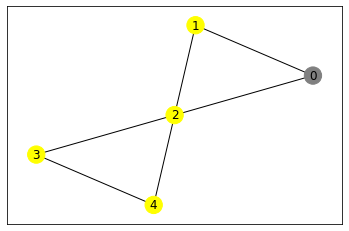

In [69]:
displaySG(10)

tensor([[-1.6059e-01, -7.6637e-02,  1.1214e+00,  ..., -1.9343e+00,
         -1.6794e+00,  6.4439e-01],
        [-1.6059e-01, -1.7232e-01, -7.0364e-01,  ..., -9.8743e-01,
         -7.9956e-01,  3.6791e-03],
        [-1.5508e-01, -1.4541e-01, -7.5313e-01,  ..., -1.7663e+00,
         -1.6759e-01, -1.4485e+00],
        ...,
        [-1.4957e-01, -1.7232e-01, -1.4371e+00,  ..., -4.6292e-01,
          1.0051e-01, -2.6023e-01],
        [ 4.0104e+00,  1.4380e+01,  1.4166e+00,  ..., -2.6940e-02,
          2.0250e-01, -2.3690e-01],
        [-1.6059e-01, -1.9325e-01, -6.3091e-01,  ..., -1.2201e+00,
         -6.4677e-01, -1.2522e+00]])

In [70]:
g.ndata['label']

tensor([22, 22, 22,  ..., 30, 30, 22])

In [72]:
g

Graph(num_nodes=232965, num_edges=114615892,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'feat': Scheme(shape=(602,), dtype=torch.float32), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool), 'train_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={'__orig__': Scheme(shape=(), dtype=torch.int64)})